In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

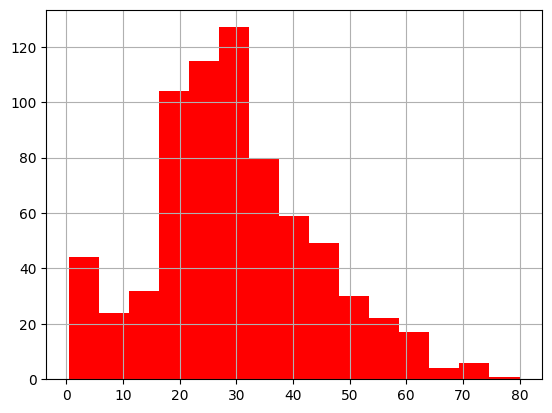

In [4]:
train_df['Age'].hist(bins=15, color='red')

In [5]:
train_df['Age'].median(skipna=True)

28.0

<Axes: xlabel='Embarked', ylabel='count'>

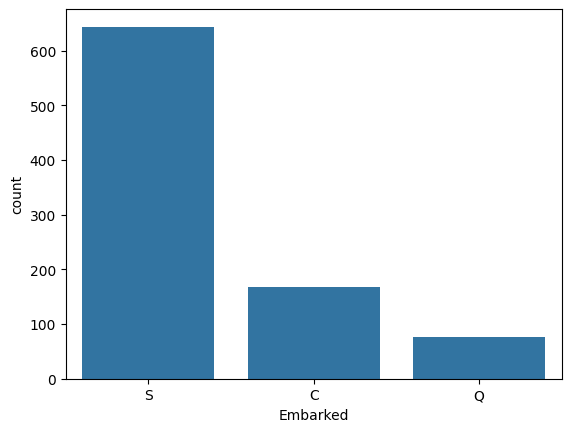

In [6]:
sns.countplot(x='Embarked', data = train_df)

In [7]:
train_data = train_df.copy()

In [8]:
train_data.head(2)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [9]:
train_data['Age'] = train_data['Age'].fillna(train_df['Age'].median(skipna=True))

train_data['Embarked'] = train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax())

train_data.drop('Cabin', axis=1, inplace=True)
#train_data = train_data.drop('Cabin', axis=1)

In [10]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
train_data['travel_alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [12]:
train_data = train_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [13]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Embarked', 'Sex', 'travel_alone'])

In [15]:
train_data = train_data.drop(['Sex_male', 'travel_alone_0'], axis=1)



In [16]:
train_data

Survived   Age     Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0           0  22.0   7.2500     False     False      True       False   
1           1  38.0  71.2833      True     False     False        True   
2           1  26.0   7.9250     False     False      True       False   
3           1  35.0  53.1000      True     False     False       False   
4           0  35.0   8.0500     False     False      True       False   
..        ...   ...      ...       ...       ...       ...         ...   
886         0  27.0  13.0000     False      True     False       False   
887         1  19.0  30.0000      True     False     False       False   
888         0  28.0  23.4500     False     False      True       False   
889         1  26.0  30.0000      True     False     False        True   
890         0  32.0   7.7500     False     False      True       False   

     Embarked_Q  Embarked_S  Sex_female  travel_alone_1  
0         False        True       False           False  
1         False       False        True           False  
2         False        True        True            True  
3         False        True        True           False  
4         False        True       False            True  
..          ...         ...         ...             ...  
886       False        True       False            True  
887       False        True        True            True  
888       False        True        True           False  
889       False       False       False            True  
890        True       False       False            True  

[891 rows x 11 columns]

In [17]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
test_data = test_df.copy()

In [19]:
test_data['Age'] = test_data['Age'].fillna(train_df['Age'].median(skipna=True))

test_data['Fare'] = test_data['Fare'].fillna(train_df['Fare'].median(skipna=True))

test_data.drop('Cabin', axis=1, inplace=True)

test_data['travel_alone'] = np.where((test_data['SibSp'] + test_data['Parch']) > 0, 0, 1)

test_data = test_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1)

test_data = pd.get_dummies(test_data, columns=['Pclass', 'Embarked', 'Sex', 'travel_alone'])

test_data = test_data.drop(['Sex_male', 'travel_alone_0'], axis=1)

test_data

Age      Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0    34.5    7.8292     False     False      True       False        True   
1    47.0    7.0000     False     False      True       False       False   
2    62.0    9.6875     False      True     False       False        True   
3    27.0    8.6625     False     False      True       False       False   
4    22.0   12.2875     False     False      True       False       False   
..    ...       ...       ...       ...       ...         ...         ...   
413  28.0    8.0500     False     False      True       False       False   
414  39.0  108.9000      True     False     False        True       False   
415  38.5    7.2500     False     False      True       False       False   
416  28.0    8.0500     False     False      True       False       False   
417  28.0   22.3583     False     False      True        True       False   

     Embarked_S  Sex_female  travel_alone_1  
0         False       False            True  
1          True        True           False  
2         False       False            True  
3          True       False            True  
4          True        True           False  
..          ...         ...             ...  
413        True       False            True  
414       False        True            True  
415        True       False            True  
416        True       False            True  
417       False       False           False  

[418 rows x 10 columns]

In [20]:
final_train = train_data.copy()
final_test = test_data.copy()

In [21]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'travel_alone_1'],
      dtype='object')

In [22]:
final_test.columns

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'travel_alone_1'],
      dtype='object')

In [23]:
feature_cols = final_test.columns

In [24]:
X = final_train[feature_cols]
y = final_train['Survived']

model = LogisticRegression()
logr = model.fit(X, y)



In [25]:
y_pred = logr.predict(X)
accuracy_score(y_pred, y)


0.7934904601571269

In [26]:
final_test.head()

Age     Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0  34.5   7.8292     False     False      True       False        True   
1  47.0   7.0000     False     False      True       False       False   
2  62.0   9.6875     False      True     False       False        True   
3  27.0   8.6625     False     False      True       False       False   
4  22.0  12.2875     False     False      True       False       False   

   Embarked_S  Sex_female  travel_alone_1  
0       False       False            True  
1        True        True           False  
2       False       False            True  
3        True       False            True  
4        True        True           False

In [27]:
final_test['Survived'] = logr.predict(final_test[feature_cols])


In [28]:
1 - final_train['Survived'].sum()/891

0.6161616161616161

In [29]:
final_test

Age      Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0    34.5    7.8292     False     False      True       False        True   
1    47.0    7.0000     False     False      True       False       False   
2    62.0    9.6875     False      True     False       False        True   
3    27.0    8.6625     False     False      True       False       False   
4    22.0   12.2875     False     False      True       False       False   
..    ...       ...       ...       ...       ...         ...         ...   
413  28.0    8.0500     False     False      True       False       False   
414  39.0  108.9000      True     False     False        True       False   
415  38.5    7.2500     False     False      True       False       False   
416  28.0    8.0500     False     False      True       False       False   
417  28.0   22.3583     False     False      True        True       False   

     Embarked_S  Sex_female  travel_alone_1  Survived  
0         False       False            True         0  
1          True        True           False         0  
2         False       False            True         0  
3          True       False            True         0  
4          True        True           False         1  
..          ...         ...             ...       ...  
413        True       False            True         0  
414       False        True            True         1  
415        True       False            True         0  
416        True       False            True         0  
417       False       False           False         0  

[418 rows x 11 columns]

In [30]:
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept


(array([[-3.19560807e-02,  7.37859187e-04,  9.99266040e-01,
          1.21371961e-01, -1.16063980e+00,  1.73655740e-01,
          1.41323707e-01, -3.54981244e-01,  2.48801040e+00,
          4.79889628e-02]]),
 array([-0.05241431]))

## Log reg with train_test_split

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, conf_matrix, precision, recall, f1

(0.7947761194029851,
 array([[140,  28],
        [ 27,  73]], dtype=int64),
 0.7227722772277227,
 0.73,
 0.7263681592039801)

## Change threshold

In [34]:
threshold = 0.8
y_pred_proba = model2.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

In [35]:
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
precision_threshold = precision_score(y_test, y_pred_threshold)
recall_threshold = recall_score(y_test, y_pred_threshold)
f1_threshold = f1_score(y_test, y_pred_threshold)

accuracy_threshold, conf_matrix_threshold, precision_threshold, recall_threshold, f1_threshold

(0.7686567164179104,
 array([[167,   1],
        [ 61,  39]], dtype=int64),
 0.975,
 0.39,
 0.5571428571428572)

## ROC-AUC

In [36]:

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

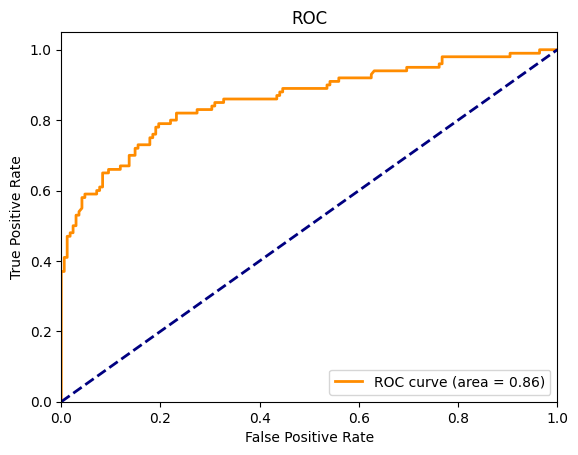

In [37]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## GridSearchCV + Stratified K-Fold

In [38]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet']}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=skf, scoring='precision')
grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best result:", grid_search.best_score_)

Best params: {'C': 0.01, 'penalty': 'l2'}
Best result: 0.7933993729060143


c:\Users\Roman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Roman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [39]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, conf_matrix, precision, recall, f1

(0.753731343283582,
 array([[157,  11],
        [ 55,  45]], dtype=int64),
 0.8035714285714286,
 0.45,
 0.5769230769230769)